# ISYE 6783 FINAL PROJECT
## Churn Prediction for Bank

author: Aslihan Celik


Dataset: https://www.kaggle.com/shrutimechlearn/churn-modelling?select=Churn_Modelling.csv

In [356]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [357]:
#setting the directory
%cd '/content/drive/MyDrive/ISYE6783_FinalProject'

/content/drive/MyDrive/ISYE6783_FinalProject


In [358]:
import pandas as pd
import random
import numpy as np
import sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt  
from sklearn import metrics

In [359]:
random.seed(3)
np.random.seed(54)

# Data Preprocessing

In [360]:
#importing the dataset
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [361]:
print("Number of samples for the customers who left the bank:",len(dataset[dataset['Exited']==1]))
print("Number of samples for the customers who stayed as a customer at the bank:",len(dataset[dataset['Exited']==0]))

Number of samples for the customers who left the bank: 2037
Number of samples for the customers who stayed as a customer at the bank: 7963


In [362]:
len(dataset)

10000

In [363]:
#Removing the columns such as customerID 
dataset.drop(columns=["RowNumber","CustomerId","Surname"], inplace=True)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Exploratory Data Analysis

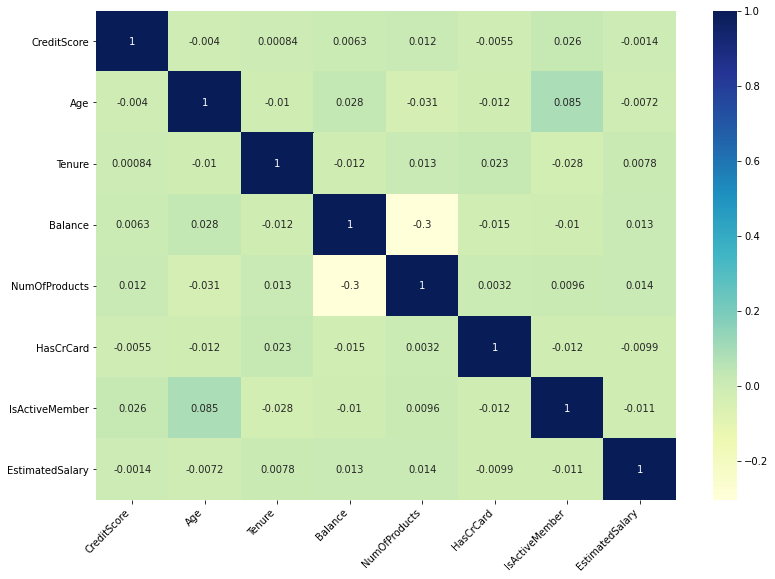

In [364]:
#Correlation Matrix with values on plot

columns=list(dataset.columns)
columns.remove("Exited")
columns

import seaborn as sns
import matplotlib.pyplot as plt

correlation_mat = dataset[columns].corr()
plt.subplots(figsize=(13,9))

map = sns.heatmap(correlation_mat, cmap= "YlGnBu" , annot=True)
map.set_xticklabels(map.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

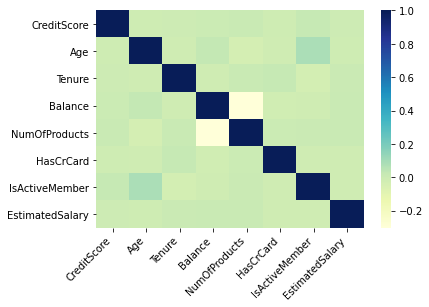

In [365]:
#Correlation Matrix without values on plot

columns=list(dataset.columns)
columns.remove("Exited")
columns

import seaborn as sns
import matplotlib.pyplot as plt

correlation_mat = dataset[columns].corr()
# plt.subplots(figsize=(1,10))

map = sns.heatmap(correlation_mat, cmap= "YlGnBu")
map.set_xticklabels(map.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

In [366]:
#one hot encoding the categorical variables

list_to_hotencode=["Geography", "Gender"]

for i in list_to_hotencode:
  one_hot=pd.get_dummies(dataset[str(i)])
  dataset=dataset.join(one_hot)
  dataset.drop(columns=[i], inplace=True)  

dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [367]:
#To make the dataset balanced
#shuffling the dataset
shuffled_dataset = dataset.iloc[np.random.permutation(len(dataset))]
#sampling equal amounts of data from each class
dataset_ready=shuffled_dataset.groupby('Exited').apply(lambda x: x.sample(2037))
dataset_ready = dataset_ready.iloc[np.random.permutation(len(dataset_ready))]
dataset_ready

CreditScore  Age  Tenure    Balance  ...  Germany  Spain  Female  Male
Exited                                            ...                              
0      3920          634   43       3  212696.32  ...        1      0       0     1
       2852          609   40       6       0.00  ...        0      0       0     1
1      9858          507   40       3  120105.43  ...        1      0       0     1
0      7756          621   36       7  116338.68  ...        0      1       1     0
1      2074          661   44       1  141136.62  ...        1      0       0     1
...                  ...  ...     ...        ...  ...      ...    ...     ...   ...
       7361          692   36       4       0.00  ...        0      0       1     0
       9947          615   34       1   83503.11  ...        0      0       0     1
0      2278          473   33       5  125827.43  ...        0      0       1     0
1      761           693   35       5  124151.09  ...        0      0       1     0
       9451          524   29       3  159035.45  ...        0      1       0     1

[4074 rows x 14 columns]

In [368]:
print("Number of samples for the customers who left the bank:",len(dataset_ready[dataset_ready['Exited']==1]))
print("Number of samples for the customers who stayed as a customer at the bank:",len(dataset_ready[dataset_ready['Exited']==0]))

Number of samples for the customers who left the bank: 2037
Number of samples for the customers who stayed as a customer at the bank: 2037


In [369]:
#EDA Continues
#Which age left the bank the most?
analysis=shuffled_dataset[['Exited','Age']].groupby(['Age']).sum()
indx_age=analysis['Exited'].idxmax()
age=analysis.loc[indx_age,'Exited']

print("The age that the customers left the bank the most is",indx_age,". Total of 91 people in this age left the bank in the dataset." )

The age that the customers left the bank the most is 46 . Total of 91 people in this age left the bank in the dataset.


In [370]:
  #Shuffle
  shuffled_dataset = dataset_ready.iloc[np.random.permutation(len(dataset_ready))]            
  # shuffled_dataset = dataset.iloc[np.random.permutation(len(dataset))]  #if you keep the dataset as imbalanced
  ##Split train 80% test 20% 
  train_per = int(len(shuffled_dataset) / 5) * 4
  train = shuffled_dataset.iloc[:train_per]
  test = shuffled_dataset.iloc[train_per:]

In [371]:
  # #No Shuffle
  # # shuffled_dataset = dataset_ready.iloc[np.random.permutation(len(dataset_ready))]            
  # # shuffled_dataset = dataset.iloc[np.random.permutation(len(dataset))]  #if you keep the dataset as imbalanced
  # ##Split train 80% test 20% 
  # train_per = int(len(dataset) / 5) * 4
  # train = dataset.iloc[:train_per]
  # test = dataset.iloc[train_per:]

In [372]:
train

CreditScore  Age  Tenure    Balance  ...  Germany  Spain  Female  Male
Exited                                            ...                              
1      5789          689   55       1   76296.81  ...        1      0       1     0
0      1116          519   42       8       0.00  ...        0      0       0     1
1      8486          738   40       6  114940.67  ...        1      0       1     0
0      9908          492   45       9  170295.04  ...        1      0       0     1
1      7506          674   44       4  131593.85  ...        1      0       1     0
...                  ...  ...     ...        ...  ...      ...    ...     ...   ...
0      9670          756   32       4       0.00  ...        0      0       1     0
       2700          564   31       4       0.00  ...        0      0       0     1
1      4220          589   45       1       0.00  ...        0      1       1     0
0      3315          527   25       6       0.00  ...        0      0       1     0
1      6272          511   46       1       0.00  ...        0      0       1     0

[3256 rows x 14 columns]

In [373]:
#convert numpy
y_train = train["Exited"].to_numpy()
y_test = test["Exited"].to_numpy()
#convert numpy and Exited
x_train = train[list(dataset.columns)[0:8] + list(dataset.columns)[9:]].to_numpy()
x_test = test[list(dataset.columns)[0:8] + list(dataset.columns)[9:]].to_numpy()


In [374]:
#Standardizing the features in x_train

from numpy import asarray
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
# # transform data
scaled = scaler.fit_transform(x_train)
print(scaled)
x_train= scaled

[[ 0.41927159  1.28971164 -1.37567719 ... -0.54327449  1.01922657
  -1.01922657]
 [-1.29589093  0.07819557  1.04383315 ... -0.54327449 -0.98113612
   0.98113612]
 [ 0.91364196 -0.10819152  0.35254448 ... -0.54327449  1.01922657
  -1.01922657]
 ...
 [-0.58964754  0.3577762  -1.37567719 ...  1.84069013  1.01922657
  -1.01922657]
 [-1.2151774  -1.50609468  0.35254448 ... -0.54327449  1.01922657
  -1.01922657]
 [-1.37660446  0.45096974 -1.37567719 ... -0.54327449  1.01922657
  -1.01922657]]


In [375]:
#Standardizing the features in dataset for x_test

from numpy import asarray
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
# # transform data
x_test = scaler.fit_transform(x_test)
print(x_test)

[[ 0.22206357  1.72996803 -1.65251359 ... -0.56323199 -1.03991583
   1.03991583]
 [ 0.43675334 -1.0389613  -0.97066939 ... -0.56323199 -1.03991583
   1.03991583]
 [ 0.24251021 -0.84800066  1.75670738 ...  1.77546734 -1.03991583
   1.03991583]
 ...
 [ 1.45908561  1.53900739 -0.6297473  ... -0.56323199 -1.03991583
   1.03991583]
 [ 0.02782044 -1.13444162  0.73394109 ... -0.56323199 -1.03991583
   1.03991583]
 [ 1.94980509 -0.37059905 -0.2888252  ... -0.56323199  0.96161629
  -0.96161629]]


# Modeling

###SVM

In [376]:
from sklearn import svm

model_svm= svm.SVC()    

In [377]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':[0.0001, 0.001, 0.01, 0.1, 1, 10]} 
grid = GridSearchCV(model_svm, parameters, n_jobs=1, verbose=3)   #5fold+gridsearch
grid.fit(x_train, y_train)
best_svm = grid.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=0.0001, kernel=linear .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. C=0.0001, kernel=linear, score=0.500, total=   0.3s
[CV] C=0.0001, kernel=linear .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............. C=0.0001, kernel=linear, score=0.499, total=   0.2s
[CV] C=0.0001, kernel=linear .........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ............. C=0.0001, kernel=linear, score=0.501, total=   0.2s
[CV] C=0.0001, kernel=linear .........................................
[CV] ............. C=0.0001, kernel=linear, score=0.501, total=   0.2s
[CV] C=0.0001, kernel=linear .........................................
[CV] ............. C=0.0001, kernel=linear, score=0.501, total=   0.2s
[CV] C=0.0001, kernel=rbf ............................................
[CV] ................ C=0.0001, kernel=rbf, score=0.500, total=   0.5s
[CV] C=0.0001, kernel=rbf ............................................
[CV] ................ C=0.0001, kernel=rbf, score=0.499, total=   0.5s
[CV] C=0.0001, kernel=rbf ............................................
[CV] ................ C=0.0001, kernel=rbf, score=0.501, total=   0.5s
[CV] C=0.0001, kernel=rbf ............................................
[CV] ................ C=0.0001, kernel=rbf, score=0.501, total=   0.5s
[CV] C=0.0001, kernel=rbf ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   45.4s finished


In [378]:
print(best_svm)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [379]:
best_svm.fit(x_train, y_train)
print(best_svm.score(x_test, y_test))

0.7799511002444988


In [380]:
from sklearn.metrics import roc_auc_score   #AUC olur mu
print(roc_auc_score(y_test, best_svm.decision_function(x_test)))

0.8672166427546628


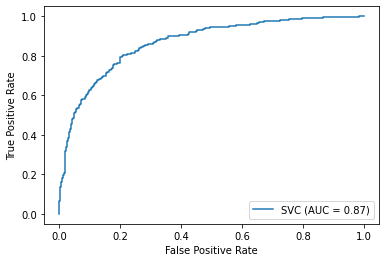

In [381]:
metrics.plot_roc_curve(best_svm, x_test, y_test)  

In [382]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

prediction = best_svm.predict(x_test)             

print('Accuracy:', accuracy_score(y_test, prediction))
print('F1 score:', f1_score(y_test, prediction))
print('Recall:', recall_score(y_test, prediction))
print('Precision:', precision_score(y_test, prediction))
print('\n clasification report:\n', classification_report(y_test,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))

Accuracy: 0.7799511002444988
F1 score: 0.7686375321336761
Recall: 0.7292682926829268
Precision: 0.8125

 clasification report:
               precision    recall  f1-score   support

           0       0.75      0.83      0.79       408
           1       0.81      0.73      0.77       410

    accuracy                           0.78       818
   macro avg       0.78      0.78      0.78       818
weighted avg       0.78      0.78      0.78       818


 confussion matrix:
 [[339  69]
 [111 299]]


## Linear Svm

In [383]:
from sklearn import svm

model_svm_lin= svm.SVC() 

In [384]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['linear',], 'C':[0.0001, 0.001, 0.01, 0.1, 1, 10]} 
grid = GridSearchCV(model_svm_lin, parameters, n_jobs=1, verbose=3)   #5fold+gridsearch
grid.fit(x_train, y_train)
best_svm_lin= grid.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=0.0001, kernel=linear .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. C=0.0001, kernel=linear, score=0.500, total=   0.3s
[CV] C=0.0001, kernel=linear .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............. C=0.0001, kernel=linear, score=0.499, total=   0.2s
[CV] C=0.0001, kernel=linear .........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ............. C=0.0001, kernel=linear, score=0.501, total=   0.2s
[CV] C=0.0001, kernel=linear .........................................
[CV] ............. C=0.0001, kernel=linear, score=0.501, total=   0.2s
[CV] C=0.0001, kernel=linear .........................................
[CV] ............. C=0.0001, kernel=linear, score=0.501, total=   0.2s
[CV] C=0.001, kernel=linear ..........................................
[CV] .............. C=0.001, kernel=linear, score=0.712, total=   0.2s
[CV] C=0.001, kernel=linear ..........................................
[CV] .............. C=0.001, kernel=linear, score=0.684, total=   0.2s
[CV] C=0.001, kernel=linear ..........................................
[CV] .............. C=0.001, kernel=linear, score=0.679, total=   0.2s
[CV] C=0.001, kernel=linear ..........................................
[CV] .............. C=0.001, kernel=linear, score=0.699, total=   0.2s
[CV] C=0.001, kernel=linear ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   10.5s finished


In [385]:
print(best_svm_lin)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [386]:
best_svm_lin.fit(x_train, y_train)
print(best_svm_lin.score(x_test, y_test))

0.7212713936430318


In [387]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

prediction = best_svm_lin.predict(x_test)             

print('Accuracy:', accuracy_score(y_test, prediction))
print('F1 score:', f1_score(y_test, prediction))
print('Recall:', recall_score(y_test, prediction))
print('Precision:', precision_score(y_test, prediction))
print('\n clasification report:\n', classification_report(y_test,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))

Accuracy: 0.7212713936430318
F1 score: 0.715
Recall: 0.697560975609756
Precision: 0.7333333333333333

 clasification report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73       408
           1       0.73      0.70      0.71       410

    accuracy                           0.72       818
   macro avg       0.72      0.72      0.72       818
weighted avg       0.72      0.72      0.72       818


 confussion matrix:
 [[304 104]
 [124 286]]


###LOGISTIC REGRESSION

In [388]:
from sklearn.linear_model import LogisticRegression

In [389]:
model_lr = LogisticRegression()   

In [390]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l1','l2'], 'C':[0.001, 0.01, 0.1, 1, 10]} 
grid_lr = GridSearchCV(model_lr, parameters, n_jobs=1, verbose=3)   #5fold+gridsearch
grid_lr.fit(x_train, y_train)
best_lr = grid_lr.best_estimator_
print(best_lr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=nan, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=nan, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=nan, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=nan, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=nan, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] ................. C=0.001, penalty=l2, score=0.718, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The sc

[CV] ................... C=0.1, penalty=l2, score=0.691, total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ................... C=0.1, penalty=l2, score=0.728, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


In [391]:
best_lr.fit(x_train, y_train)
print(best_lr.score(x_test, y_test)) 

0.7029339853300733


In [392]:
from sklearn.metrics import roc_auc_score 
print(roc_auc_score(y_test, best_lr.predict_proba(x_test)[:, 1]))
print(roc_auc_score(y_test, best_lr.decision_function(x_test)))

0.7734576757532281
0.7734576757532281


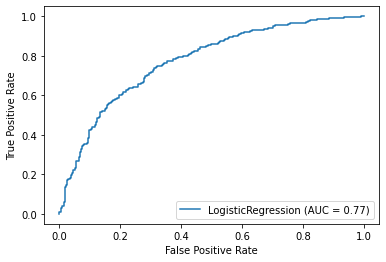

In [393]:
import matplotlib.pyplot as plt  
from sklearn import metrics
metrics.plot_roc_curve(best_lr, x_test, y_test)  


In [394]:
prediction_lr = best_lr.predict(x_test)             

print('Accuracy:', accuracy_score(y_test, prediction_lr))
print('F1 score:', f1_score(y_test, prediction_lr))
print('Recall:', recall_score(y_test, prediction_lr))
print('Precision:', precision_score(y_test, prediction_lr))
print('\n clasification report:\n', classification_report(y_test,prediction_lr))
print('\n confussion matrix:\n',confusion_matrix(y_test, prediction_lr))

Accuracy: 0.7029339853300733
F1 score: 0.6973848069738481
Recall: 0.6829268292682927
Precision: 0.712468193384224

 clasification report:
               precision    recall  f1-score   support

           0       0.69      0.72      0.71       408
           1       0.71      0.68      0.70       410

    accuracy                           0.70       818
   macro avg       0.70      0.70      0.70       818
weighted avg       0.70      0.70      0.70       818


 confussion matrix:
 [[295 113]
 [130 280]]


###DECISION TREE

In [395]:
from sklearn import tree

In [396]:
model_dt = tree.DecisionTreeClassifier()

In [397]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy'],'splitter':['best', 'random'], 'max_depth':[3, 5, 7, None]} 
grid_dt = GridSearchCV(model_dt, parameters, n_jobs=1, verbose=3)   #5fold+gridsearch
grid_dt.fit(x_train, y_train)
best_dt = grid_dt.best_estimator_
print(best_dt)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] criterion=gini, max_depth=3, splitter=best ......................
[CV]  criterion=gini, max_depth=3, splitter=best, score=0.686, total=   0.0s
[CV] criterion=gini, max_depth=3, splitter=best ......................
[CV]  criterion=gini, max_depth=3, splitter=best, score=0.728, total=   0.0s
[CV] criterion=gini, max_depth=3, splitter=best ......................
[CV]  criterion=gini, max_depth=3, splitter=best, score=0.711, total=   0.0s
[CV] criterion=gini, max_depth=3, splitter=best ......................
[CV]  criterion=gini, max_depth=3, splitter=best, score=0.757, total=   0.0s
[CV] criterion=gini, max_depth=3, splitter=best ......................
[CV]  criterion=gini, max_depth=3, splitter=best, score=0.751, total=   0.0s
[CV] criterion=gini, max_depth=3, splitter=random ....................
[CV]  criterion=gini, max_depth=3, splitter=random, score=0.670, total=   0.0s
[CV] criterion=gini, max_depth=3, splitter=random

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=7, splitter=best, score=0.748, total=   0.0s
[CV] criterion=gini, max_depth=7, splitter=best ......................
[CV]  criterion=gini, max_depth=7, splitter=best, score=0.771, total=   0.0s
[CV] criterion=gini, max_depth=7, splitter=random ....................
[CV]  criterion=gini, max_depth=7, splitter=random, score=0.750, total=   0.0s
[CV] criterion=gini, max_depth=7, splitter=random ....................
[CV]  criterion=gini, max_depth=7, splitter=random, score=0.725, total=   0.0s
[CV] criterion=gini, max_depth=7, splitter=random ....................
[CV]  criterion=gini, max_depth=7, splitter=random, score=0.710, total=   0.0s
[CV] criterion=gini, max_depth=7, splitter=random ....................
[CV]  criterion=gini, max_depth=7, splitter=random, score=0.756, total=   0.0s
[CV] criterion=gini, max_depth=7, splitter=random ....................
[CV]  criterion=gini, max_depth=7, splitter=random, score=0.773, total=   0.0s
[CV] criterion=gini, max_

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.8s finished


In [398]:
best_dt.fit(x_train, y_train)
print(best_dt.score(x_test, y_test))

0.8056234718826406


In [399]:

print(roc_auc_score(y_test, best_dt.predict_proba(x_test)[:, 1]))

0.8699306551889049


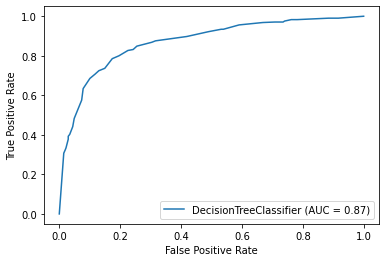

In [400]:
import matplotlib.pyplot as plt  
from sklearn import metrics
metrics.plot_roc_curve(best_dt, x_test, y_test)  

In [401]:
prediction_dt = best_dt.predict(x_test)             

print('Accuracy:', accuracy_score(y_test, prediction_dt))
print('F1 score:', f1_score(y_test, prediction_dt))
print('Recall:', recall_score(y_test, prediction_dt))
print('Precision:', precision_score(y_test, prediction_dt))
print('\n clasification report:\n', classification_report(y_test,prediction_dt))
print('\n confussion matrix:\n',confusion_matrix(y_test, prediction_dt))

Accuracy: 0.8056234718826406
F1 score: 0.8019925280199254
Recall: 0.7853658536585366
Precision: 0.8193384223918575

 clasification report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       408
           1       0.82      0.79      0.80       410

    accuracy                           0.81       818
   macro avg       0.81      0.81      0.81       818
weighted avg       0.81      0.81      0.81       818


 confussion matrix:
 [[337  71]
 [ 88 322]]


## Random Forest for Future Importance

In [402]:
a=list(dataset_ready.columns)
a.remove("Exited")
a


['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'France',
 'Germany',
 'Spain',
 'Female',
 'Male']

In [403]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
model_rf = RandomForestClassifier() #max_depth=2, random_state=0

parameters = {'n_estimators':[10,50, 100, 150],'max_depth':[5, 7, 9, 11, None], 'min_samples_split':[2, 4, 8 , 10, 12]} 
grid_rf = GridSearchCV(model_rf, parameters, n_jobs=1, verbose=3)   #5fold+gridsearch
grid_rf.fit(x_train, y_train)
best_rf = grid_rf.best_estimator_
print(best_rf)


best_rf.fit(x_train, y_train)
sorted_idx=best_rf.feature_importances_.argsort()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] max_depth=5, min_samples_split=2, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=2, n_estimators=10, score=0.736, total=   0.0s
[CV] max_depth=5, min_samples_split=2, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=2, n_estimators=10, score=0.762, total=   0.0s
[CV] max_depth=5, min_samples_split=2, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=2, n_estimators=10, score=0.740, total=   0.0s
[CV] max_depth=5, min_samples_split=2, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=2, n_estimators=10, score=0.765, total=   0.0s
[CV] max_depth=5, min_samples_split=2, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=2, n_estimators=10, score=0.779, total=   0.0s
[CV] max_depth=5, min_samples_split=2, n_estimators=50 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=5, min_samples_split=2, n_estimators=50, score=0.733, total=   0.2s
[CV] max_depth=5, min_samples_split=2, n_estimators=50 ...............
[CV]  max_depth=5, min_samples_split=2, n_estimators=50, score=0.754, total=   0.1s
[CV] max_depth=5, min_samples_split=2, n_estimators=50 ...............
[CV]  max_depth=5, min_samples_split=2, n_estimators=50, score=0.731, total=   0.1s
[CV] max_depth=5, min_samples_split=2, n_estimators=50 ...............
[CV]  max_depth=5, min_samples_split=2, n_estimators=50, score=0.759, total=   0.1s
[CV] max_depth=5, min_samples_split=2, n_estimators=50 ...............
[CV]  max_depth=5, min_samples_split=2, n_estimators=50, score=0.799, total=   0.2s
[CV] max_depth=5, min_samples_split=2, n_estimators=100 ..............
[CV]  max_depth=5, min_samples_split=2, n_estimators=100, score=0.744, total=   0.3s
[CV] max_depth=5, min_samples_split=2, n_estimators=100 ..............
[CV]  max_depth=5, min_samples_split=2, n_estimators=100, score=0.768

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.2min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [404]:
prediction_rf = best_rf.predict(x_test)          

print('Accuracy:', accuracy_score(y_test, prediction_rf))
print('F1 score:', f1_score(y_test, prediction_rf))
print('Recall:', recall_score(y_test, prediction_rf))
print('Precision:', precision_score(y_test, prediction_rf))
print('\n clasification report:\n', classification_report(y_test,prediction_rf))
print('\n confussion matrix:\n',confusion_matrix(y_test, prediction_rf))

Accuracy: 0.8019559902200489
F1 score: 0.7901554404145077
Recall: 0.7439024390243902
Precision: 0.8425414364640884

 clasification report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       408
           1       0.84      0.74      0.79       410

    accuracy                           0.80       818
   macro avg       0.81      0.80      0.80       818
weighted avg       0.81      0.80      0.80       818


 confussion matrix:
 [[351  57]
 [105 305]]


According to this age is the most important feature. The second most important feature is Number Of Products.

Text(0.5, 1.0, 'Feature Importance')

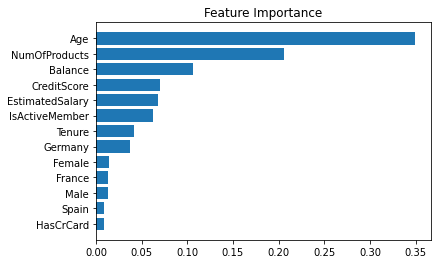

In [405]:
plt.barh(train[list(dataset.columns)[0:8] + list(dataset.columns)[9:]].columns[sorted_idx], best_rf.feature_importances_[sorted_idx]) 
plt.title("Feature Importance")